In [4]:
import jax.numpy as np # Unica differenza!

x = np.ones((5000, 5000))
y = np.arange(5000)

z = np.sin(x) + np.cos(y) 

### Compilatore Jit

In [8]:
from jax import jit

@jit
def fn(x, y):
  z = np.sin(x)
  w = np.cos(y)
  return z + w

fn(x, y)

DeviceArray([[ 1.841471  ,  1.3817732 ,  0.4253242 , ...,  0.5489286 ,
              -0.12124908,  0.09369361],
             [ 1.841471  ,  1.3817732 ,  0.4253242 , ...,  0.5489286 ,
              -0.12124908,  0.09369361],
             [ 1.841471  ,  1.3817732 ,  0.4253242 , ...,  0.5489286 ,
              -0.12124908,  0.09369361],
             ...,
             [ 1.841471  ,  1.3817732 ,  0.4253242 , ...,  0.5489286 ,
              -0.12124908,  0.09369361],
             [ 1.841471  ,  1.3817732 ,  0.4253242 , ...,  0.5489286 ,
              -0.12124908,  0.09369361],
             [ 1.841471  ,  1.3817732 ,  0.4253242 , ...,  0.5489286 ,
              -0.12124908,  0.09369361]], dtype=float32)

In [28]:
size = 3000
x = random.normal(key, (size, size), dtype=np.float32)
%timeit np.dot(x, x.T).block_until_ready()  

9.85 ms ± 225 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Random

In [20]:
from jax import random

key = random.PRNGKey(0)
x = random.normal(key, (10,))
print(x)

[-0.3721109   0.26423115 -0.18252768 -0.7368197  -0.44030377 -0.1521442
 -0.67135346 -0.5908641   0.73168886  0.5673026 ]


### Auto-diff

In [46]:
from jax import grad

def logistic(x):
    return (1 / 1 + np.exp(x))

In [47]:
d1_log = grad(logistic)

In [61]:
# Can only be called on scalars
x = np.arange(3).astype(np.float32)
[d1_log(i) for i in x]

[DeviceArray(1., dtype=float32),
 DeviceArray(2.7182817, dtype=float32),
 DeviceArray(7.389056, dtype=float32)]

### Usiamo VMAP!

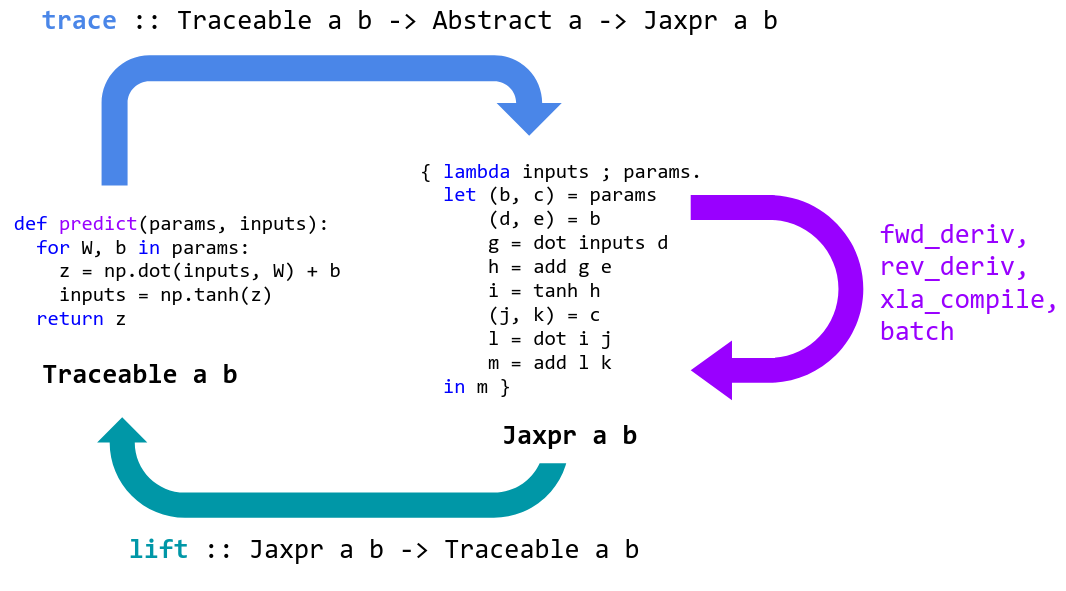

In [63]:
from jax import vmap
vmap(d1_log)(x)

DeviceArray([1.       , 2.7182817, 7.389056 ], dtype=float32)

#### (!) JAX arrays are immutable

In [54]:
# JAX: immutable arrays
x = np.arange(10)
x[0] = 10

TypeError: '<class 'jax.interpreters.xla._DeviceArray'>' object does not support item assignment. JAX arrays are immutable; perhaps you want jax.ops.index_update or jax.ops.index_add instead?

### Static vs Traced Operations
Key Concepts:

- Just as values can be either static or traced, operations can be static or traced.

- Static operations are evaluated at compile-time in Python; traced operations are compiled & evaluated at run-time in XLA.

- Use numpy for operations that you want to be static; use jax.numpy for operations that you want to be traced.

This distinction between static and traced values makes it important to think about how to keep a static value static. Consider this function:

In [56]:
import jax.numpy as jnp
from jax import jit

@jit
def f(x):
  print(f"x = {x}")
  print(f"x.shape = {x.shape}")
  print(f"jnp.array(x.shape).prod() = {jnp.array(x.shape).prod()}")
  # comment this out to avoid the error:
  # return x.reshape(jnp.array(x.shape).prod())

f(x)

x = Traced<ShapedArray(float32[2,3])>with<DynamicJaxprTrace(level=0/1)>
x.shape = (2, 3)
jnp.array(x.shape).prod() = Traced<ShapedArray(int32[])>with<DynamicJaxprTrace(level=0/1)>
